In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete
import scipy.optimize as opt

In [14]:
df = pd.read_stata("/Users/leontagle/Downloads/lm2019.dta")

In [4]:
print(df.head())

     licencia id_profesional     id_trabajador      id_empleador  \
0  11805736.0                 4733AAECB6C75AA4  A26FC0850C7308C3   
1  11807212.0                 6BC22DF618A7F542  78DA0D88692F13B0   
2  11807301.0                 D1F70649EF0901E5  F2FDB64160B1D93C   
3  11807735.0                 7C1BD7E4C026B0E0  90E696882AD41C06   
4  11807773.0                 8731CBF7362885F3  6A2AD4E387A4210C   

        tipo_formulario cod_categoria_cie10 cod_subcategoria_cie10  \
0  Electrónica MEDIPASS                 F32                   F321   
1  Electrónica MEDIPASS                 M51                   M511   
2  Electrónica MEDIPASS                 B26                   B269   
3  Electrónica MEDIPASS                 N83                   N830   
4  Electrónica MEDIPASS                 M54                   M544   

  fecha_emision  fecha_emision_dia  fecha_emision_mes  fecha_emision_anio  \
0    2019-01-02                  2                  1                2019   
1    2019-01-02 

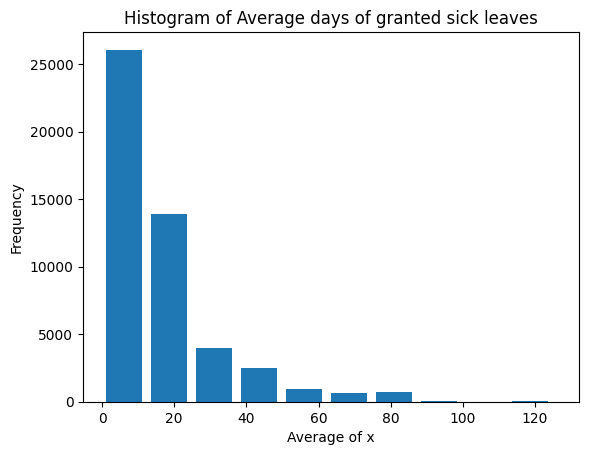

In [301]:
# Compute the average of 'x' by 'group'
average_days = df.groupby('id_profesional')['dias_autorizados'].mean()

# Plot histogram of the group averages
plt.hist(average_days, bins=10, edgecolor='none', width=10)
plt.xlabel('Average of x')
plt.ylabel('Frequency')
plt.title('Histogram of Average days of granted sick leaves')
plt.show()

In [262]:
df['dias_dummy'] = np.where(df['dias_autorizados'] >= 30, 1, 0)
df['patient_count'] = df.groupby('id_trabajador')['id_trabajador'].transform('size')
df['no_repeat_dummy'] = np.where(df['patient_count'] == 1, 1, 0)

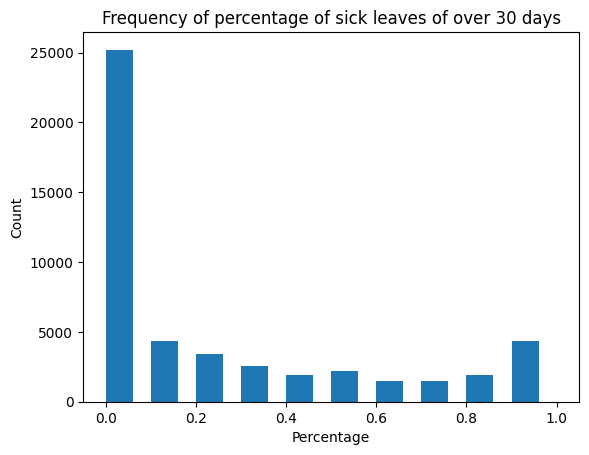

In [302]:
# Compute the average of 'x' by 'group'
percentage_over_30 = df.groupby('id_profesional')['dias_dummy'].mean()

# Plot histogram of the group averages
plt.hist(percentage_over_30, bins=10, edgecolor='none', width = 0.06)
plt.xlabel('Percentage')
plt.ylabel('Count')
plt.title('Frequency of percentage of sick leaves of over 30 days')
plt.show()

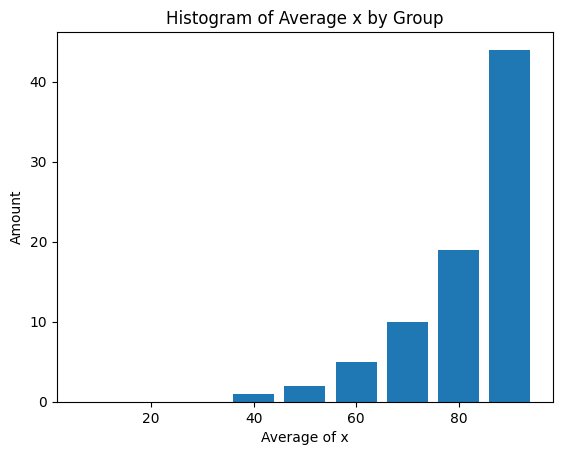

In [278]:
# Compute the average of 'x' by 'group'
quantity_over_30 = df.groupby('id_profesional')['dias_dummy'].sum()

deciles = np.percentile(quantity_over_30, np.arange(10, 100, 10))

# Plot histogram of the group averages
plt.bar(np.arange(10, 100, 10), deciles, width = 8)
plt.xlabel('Deciles (from 100)')
plt.ylabel('Amount')
plt.title('Deciles of amount of sick leaves of over 30 days')
plt.show()

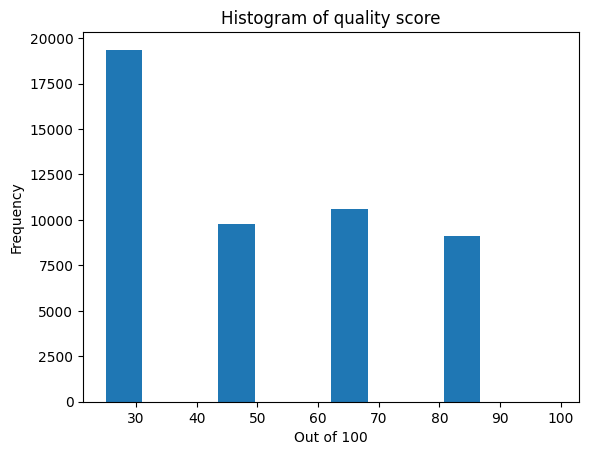

In [317]:
N = len(average_days)
percentiles = np.zeros([N,3])
physicians = pd.DataFrame({
    'average_days': average_days,
    'percentage_over_30': percentage_over_30,
    'quantity_over_30': quantity_over_30
})

criteria = [average_days, percentage_over_30, quantity_over_30]

for c, criterion in enumerate(criteria):
    # Calculate the percentile marks for the current criterion
    percentile_marks = np.percentile(criterion, np.arange(1, 100))
    # Store the percentile ranks in the percentiles array
    percentiles[:, c] = np.digitize(criterion, bins=percentile_marks) + 1

physicians['score'] = np.average(percentiles, axis = 1)

# Plot histogram of the group averages
plt.hist(physicians['score'], bins=4, edgecolor='none', width=6)
plt.xlabel('Out of 100')
plt.ylabel('Frequency')
plt.title('Histogram of quality score')
plt.show()

In [318]:
# Determine the bin edges used in the histogram
counts, bin_edges = np.histogram(physicians['score'], bins=4)

# Add a column with the bin each `score` belongs to
physicians['bin'] = pd.cut(physicians['score'], bins=bin_edges, labels=False, include_lowest=True)

In [321]:
physicians['bin'].value_counts(normalize=True) * 100

bin
0    39.646558
2    21.687759
1    20.002457
3    18.663226
Name: proportion, dtype: float64

In [8]:
key_counts = df['id_trabajador'].value_counts()

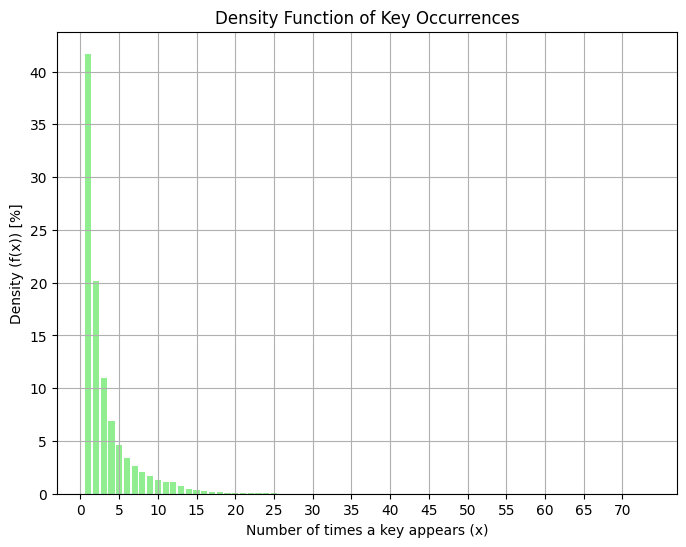

In [13]:
# Step 2: Count how many keys appear a given number of times (f(x))
frequency_of_counts = key_counts.value_counts().sort_index()

# Step 3: Convert frequencies to percentages (density)
total_keys = frequency_of_counts.sum()
density_of_counts = frequency_of_counts / total_keys * 100

# Step 4: Plot the density function
plt.figure(figsize=(8, 6))
plt.bar(density_of_counts.index, density_of_counts.values, width=0.8, color='lightgreen')
plt.xlabel('Number of times a key appears (x)')
plt.ylabel('Density (f(x)) [%]')
plt.title('Density Function of Key Occurrences')
max_x_value = density_of_counts.index.max()
plt.xticks(np.arange(0, max_x_value + 1, 5))
plt.grid(True)
plt.show()

In [24]:
# Step 3: Compute the CDF (cumulative sum of frequencies)
cdf_values = frequency_of_counts.cumsum() / frequency_of_counts.sum()

# Step 4: Define a CDF function
def cdf(x):
    # If x is less than the smallest value, return 0
    if x < frequency_of_counts.index.min():
        return 0.0
    # If x is larger than the largest value, return 1
    elif x >= frequency_of_counts.index.max():
        return 1.0
    # Otherwise, find the appropriate CDF value
    else:
        return cdf_values[frequency_of_counts.index[frequency_of_counts.index <= x].max()]

print(1 - cdf(1))

0.58309399299091


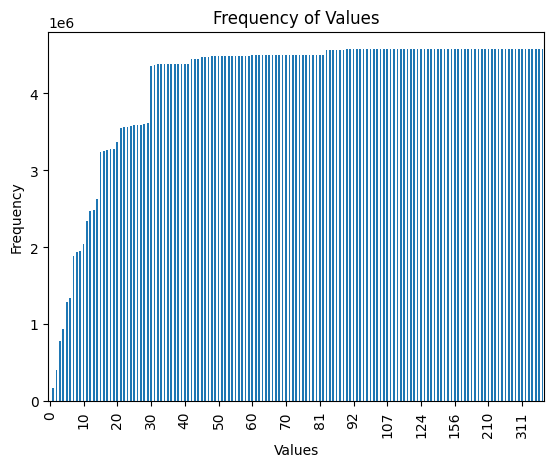

In [46]:
dias_autorizados = df['dias_autorizados'].value_counts().sort_index()
cum = dias_autorizados.cumsum()

# Plot the bar graph
cum.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency of Values')
plt.xticks(ticks=range(0, 150, 10))

# Set x-ticks to appear every 10 units

plt.show()

In [27]:
df['dias_autorizados'].value_counts().sort_index().cumsum()

dias_autorizados
0            1
1       167350
2       409619
3       787155
4       944126
        ...   
376    4573824
390    4573825
435    4573826
693    4573827
728    4573828
Name: count, Length: 147, dtype: int64

In [45]:
# Step 3: Compute the CDF (cumulative sum of frequencies)
cdf_values = dias_autorizados.cumsum() / dias_autorizados.sum()

# Step 4: Define a CDF function
def cdf(x):
    # If x is less than the smallest value, return 0
    if x < dias_autorizados.index.min():
        return 0.0
    # If x is larger than the largest value, return 1
    elif x >= dias_autorizados.index.max():
        return 1.0
    # Otherwise, find the appropriate CDF value
    else:
        return cdf_values[dias_autorizados.index[dias_autorizados.index <= x].max()]

cdf(29)

np.float64(0.7913804366932906)

In [15]:
salary_quality = np.array([
                        [20000, 10, 20, 20, 30],
                        [40000, 20, 30, 40, 50],
                        [60000, 30, 40, 50, 60],
                        [80000, 40, 50, 60, 60]
                        ])

N = len(df)
draw = np.random.choice([0, 1, 2, 3], size=(N, 2))

df['salary'] = salary_quality[draw[:,0],0]
df['quality'] = salary_quality[draw[:,0],
                               draw[:,1] + 1] # Move 1 column to the right
df['tau'] = 0.8*df['salary']

In [16]:
df['quality']

0          60
1          60
2          50
3          50
4          20
           ..
4573823    60
4573824    20
4573825    50
4573826    30
4573827    30
Name: quality, Length: 4573828, dtype: int64

In [113]:
physicians_over_k = df.groupby('id_profesional')['dias_dummy'].max()
print('Physicians which have granted sick leave of 30 days or more')
print(f"{physicians_over_k.mean() * 100:.2f}%")

Physicians which have granted sick leave of 30 days or more
63.89%


In [114]:
physicians_repeat_patient = df.groupby('id_profesional')['no_repeat_dummy'].max()
print('Physicians who have seen a patient only once')
print(f"{physicians_repeat_patient.mean() * 100:.2f}%")

Physicians who have seen a patient only once
74.57%


In [115]:
df['quality'].value_counts(normalize=True) * 100

quality
50    18.777707
20    18.762643
30    18.748803
40    18.747622
60    18.724185
10     6.239041
Name: proportion, dtype: float64

In [116]:
physicians_over_k_total = df.groupby('id_profesional')['dias_dummy'].transform('max')
subset_over_k = df[physicians_over_k_total==1]
print('Quality composition in over 30 days subset')
print(subset_over_k['quality'].value_counts(normalize=True) * 100)

Quality composition in over 30 days subset
quality
50    18.788933
20    18.761552
30    18.751532
40    18.750704
60    18.713109
10     6.234170
Name: proportion, dtype: float64


In [117]:
physicians_repeat_patient_total = df.groupby('id_profesional')['no_repeat_dummy'].transform('max')
subset_repeat = df[physicians_repeat_patient_total==1]
print('Quality composition in no repeat patients subset')
print(subset_repeat['quality'].value_counts(normalize=True) * 100)

Quality composition in no repeat patients subset
quality
50    18.777608
20    18.762906
40    18.749641
30    18.748339
60    18.721539
10     6.239967
Name: proportion, dtype: float64


In [118]:
V_r_total = df.groupby(['salary', 'quality']).size().reset_index(name='count')
V_r_subset_over_k = subset_over_k.groupby(['salary', 'quality']).size().reset_index(name='count')
V_r_subset_repeat = subset_repeat.groupby(['salary', 'quality']).size().reset_index(name='count')
V_r_total

,salary,quality,count
0,20000,10,285363
1,20000,20,571655
2,20000,30,286482
3,40000,20,286516
4,40000,30,285757
5,40000,40,285371
6,40000,50,287690
7,60000,30,285299
8,60000,40,286272
9,60000,50,285461


In [3]:
# Library imports
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import expon
from scipy.stats import uniform
import time
from scipy.optimize import minimize

In [71]:
# Utility Function

def utility(ki,gammai,kj,Vj,t):
    """
    Computes the J x I matrix of uij's, patient's i utility from patient j if a visit takes place

    Arguments:
        ki: 1 x I vector of patients' "medical necesity", κ_i parameter.
        gammai: 1 x I vector of patients' "taste for certificates", γ_i parameter.
        kj: J x 1 vector of doctors' chosen threshold, κ_j parameter.
        Vj: J x 1 vector of doctors' "service quality", V_j parameter.
        t: parametrized cost of visit.
    """

    # Reshaping parameters to ensure proper broadcasting
    ki = np.array(ki).reshape((1,-1))             # 1 x I
    gammai = np.array(gammai).reshape((1,-1))     # 1 x I
    kj = np.array(kj).reshape((-1,1))             # J x 1
    Vj = np.array(Vj).reshape((-1,1))             # J x 1
    t = np.array(t).reshape((-1,1))               # J x 1

    return Vj * ki - t + np.where(ki >= kj, gammai, 0)
                    # This way γ_i is summed if patient i's κ_i is above doctor j's threshold κ_j.

In [72]:
# Logit Search definition

class LogitSearch:

    def __init__(self, ki,  # 1 x I vector of patients' "medical necesity", κ_i parameter.
                    gammai, # 1 x I vector of patients' "taste for certificates", γ_i parameter.
                    kj,     # J x 1 vector of doctors' chosen threshold, κ_j parameter.
                    Vj,     # J x 1 vector of doctors' "service quality", V_j parameter.
                    t,      # Scalar. Parametrized cost of visit.
                    λ):     # Scalar. Logit shape parameter.
    
        # Save parameters
        self.ki, self.gammai, self.kj, self.Vj, self.t, self.λ = ki, gammai, kj, Vj, t, λ

    def U(self):
        """
        Computes the J x I matrix of uij's, patient's i utility from patient j if a visit takes place.
        See definition above.
        """

        # Unpack parameters
        ki, gammai, kj, Vj, t = self.ki, self.gammai, self.kj, self.Vj, self.t

        return utility(ki,gammai,kj,Vj,t)
    
    def alpha_matrix(self):
        """
        Intermediate matrix used to compute S matrix of patients' sij's.
        alpha_ij equals e^(λ*uij) if uij > 0, else 0 (free disposal requirement)
        """

        λ = self.λ  # scalar
        U = self.U()  # J x I matrix of uij's

        return np.where(U > 0, np.exp(λ*U), 0)
    
    def S(self):
        """
        J x I matrix 'S' of patients' strategy vectors S_i, where each component sij stands for
        the probability that patient i visits doctor j.

        (Implicit) arguments:
            ki: 1 x I vector of patients' "medical necesity", κ_i parameter.
            gammai: 1 x I vector of patients' "taste for certificates", γ_i parameter.
            kj: J x 1 vector of doctors' chosen threshold, κ_j parameter.
            Vj: J x 1 vector of doctors' "service quality", V_j parameter.
            t: Scalar. Parametrized cost of visit.
            λ: Scalar. Logit shape parameter.

        Returns:
            s_ij  =  alpha_ij / Σ_j=1^J (alpha_ij)       if      Σ_j=1^J (alpha_ij) > 0
                  =  0                                   ~
                where
            alpha_ij  =  e^(λ*uij)        if      uij > 0
                      =  0                 ~

        Output form:
            s_{i=1,j=1}   s_{i=2,j=1}   ...   s_{i=I,j=1}
            s_{i=1,j=2}   ...                   ...
            # ...                               ...
            s_{i=1,j=J}   ...           ...   s_{i=I,j=J}

        Note:
            It's set up to handle the posibility that no doctors give a certain patient i positive
            utility, in which case he visits none of them -- i.e. S_i = vector(0).
            In all other cases the probability that i visits "some" doctor equals 1.
        """

        # alpha_matrix is a J x I matrix where alpha_ij equals e^(λ*uij) if uij > 0, else 0
        alpha_matrix = self.alpha_matrix()
        # alphai_total outputs the column-wise sum of alpha_ij's, i.e. the total by patient
        alphai_total = np.sum(alpha_matrix, axis = 0)

        with np.errstate(divide='ignore', invalid='ignore'):
            # To avoid pesky division by zero warning      
            return np.where(alphai_total != 0, alpha_matrix/alphai_total, 0)

In [73]:
# Schnell Search definition

class SchnellSearch:

    def __init__(self, ki,  # 1 x I vector of patients' "medical necesity", κ_i parameter.
                    gammai, # 1 x I vector of patients' "taste for certificates", γ_i parameter.
                    kj,     # J x 1 vector of doctors' chosen threshold, κ_j parameter.
                    Vj,     # J x 1 vector of doctors' "service quality", V_j parameter.
                    t,      # Scalar. Parametrized cost of visit.
                    beta):  # Scalar. Reserve utility discount parameter.
    
        # Save parameters
        self.ki, self.gammai, self.kj, self.Vj, self.t, self.beta = ki, gammai, kj, Vj, t, beta

    def U(self):
        """
        Computes the J x I matrix of uij's, patient's i utility from patient j if a visit takes place.
        See definition above.
        """

        # Unpack parameters
        ki, gammai, kj, Vj, t = self.ki, self.gammai, self.kj, self.Vj, self.t

        return utility(ki,gammai,kj,Vj,t)
    
    def U_root(self):
        """ 
        Returns the J-sized vector of patients' reserve utility (U_bar) using vectorization 
        """

        beta = self.beta
        if (beta >= 1 or beta < 0):   raise ValueError("Invalid beta. Please choose β in [0,1).")

        # We sort U column-wise, it's J x I
        U_matrix = np.sort(self.U(), axis=0)
        J = U_matrix.shape[0]
        I = U_matrix.shape[1]

        # Upper diagonal ones column
        greater_than = np.triu(np.ones((J,J)))
        # Total sum of uij for j above u_bar_i
        sum_of_uijs = greater_than @ U_matrix
        # Number of j doctors whose uij is above u_bar_i
        number_of_js = np.arange(J, 0, -1).reshape(-1,1)
        # Average expected ui when selecting u_bar_i threshold
        U_over_average = sum_of_uijs / number_of_js
        # How much that average is above the threshold
        gain_over_reserve = U_over_average - U_matrix

        # β / 1 - β
        beta_multiplier = beta / (1 - beta)
        # β / 1 - β * int_U U - U_bar dF(U)
        RHS = beta_multiplier * gain_over_reserve
        # | U_bar - β / 1 - β * int_U U - U_bar dF(U) |, which we define as error
        error = np.abs(U_matrix - RHS)
        # Row-wise take the index of the uij which minimizes error
        min_index = np.argmin(error, axis = 0)
        # Select the respecttive index for each row, outputting the argmin
        U_roots = U_matrix[min_index, np.arange(I)]

        # We select the U which minimizes error as opposed to computing the root
        # directly, which in this case doesn't matter, as we're working with
        # a discrete vector of doctors

        # Where the root is below 0, we select 0, to fulfill 'free disposal'

        # We select the U which minimizes error as opposed to computing the root
        # directly, which in this case doesn't matter, as we're working with
        # a discrete vector of doctors

        # Where the root is below 0, we select 0, to fulfill 'free disposal'
        return np.maximum(U_roots, 0)
    
    def S(self): 
        """
        J x I matrix 'S' of patients' strategy vectors S_i, where each component sij stands for
        the probability that patient i visits doctor j.

        (Implicit) arguments:
            ki: 1 x I vector of patients' "medical necesity", κ_i parameter.
            gammai: 1 x I vector of patients' "taste for certificates", γ_i parameter.
            kj: J x 1 vector of doctors' chosen threshold, κ_j parameter.
            Vj: J x 1 vector of doctors' "service quality", V_j parameter.
            t: Scalar. Parametrized cost of visit.
            λ: Scalar. Logit shape parameter.

        Returns:
            s_ij  =  1 / Σ_j=1^J I[uij > u_bar_i]       if      uij > u_bar_i 
                  =  0                                   ~
                where
            alpha_ij  =  e^(λ*uij)        if      uij > 0
                      =  0                 ~

        Output form:
            s_{i=1,j=1}   s_{i=2,j=1}   ...   s_{i=I,j=1}
            s_{i=1,j=2}   ...                   ...
            # ...                               ...
            s_{i=1,j=J}   ...           ...   s_{i=I,j=J}

        Note:
            It's set up to handle the posibility that no doctors give a certain patient i positive
            utility, in which case he visits none of them -- i.e. S_i = vector(0).
            In all other cases the probability that i visits "some" doctor equals 1.
        """

        # U matrix and U_bar vector
        U_matrix = self.U()   
        U_bars = self.U_root().reshape(1,-1)
        
        # Array which = 1 if uij > u_bar_i
        U_over_reserve = np.where(U_matrix >= U_bars, 1, 0)
        # sij is 1 divided by the total of doctors j which uij > u_bar_i, for each patient i
        sum_above = np.sum(U_over_reserve, axis = 0)
        with np.errstate(divide='ignore', invalid='ignore'):
            # To avoid pesky division by zero warning       
            return np.where(sum_above > 0,
                            np.divide(U_over_reserve, sum_above),
                            0)    

In [74]:
# Best response functions

def best_response(k0,                   # Input vector
                  custom_function,      # Function to be maximized
                  start, stop):    # Inputs for the linspace
    """
    Outputs 2 decimals best response vector within specified grid to k0 vector.

    Arguments:
        k0: Initial vector to be used for best response computation.
        custom_function: Function maximized whose argmax is the best response.
        Start, stop: Specify grid within which the maximal for custom_function is to be searched.
    """
    
    # We choose an 0.1 step size to start, to span the whole range
    linspace_values = np.arange(start, stop + 0.1, 0.1)

    k_output = []
    # Plot results for each index in i_values
    for i in range(len(k0)):
        # Store the results of the function evaluations for this component
        results_1d = []

        # Keep the original vector unchanged for components not in i_values
        k_fixed = np.copy(k0)
        
        # Evaluate the function over the linspace
        for value in linspace_values:
            k_fixed[i] = value  # Update the i-th component
            result = custom_function(k_fixed)[i]  # Evaluate the function (assumes f returns a vector)
            results_1d.append(result)

        max_index = np.argmax(results_1d)

        new_k = linspace_values[max_index]
        step = 0.09

        if new_k == 0:
            k_fixed[i] = new_k
            result_zero = custom_function(k_fixed)[i]
            k_fixed[i] += 0.01
            result_prime = custom_function(k_fixed)[i]

            if result_prime > result_zero:
                decimals = np.linspace(new_k, new_k + step, 10) # 10 values above inc. 0
                results_2d = []
                # Evaluate the function over the linspace
                for value in decimals:
                    k_fixed[i] = value  # Update the i-th component
                    result = custom_function(k_fixed)[i]  # Evaluate the function (assumes f returns a vector)
                    results_2d.append(result)
                    
                max_index_2 = np.argmax(results_2d)
                result_k = decimals[max_index_2]
                k_output.append(result_k)    

            else:
                k_output.append(new_k)

        elif new_k == 1:
            k_fixed[i] = new_k
            result_one = custom_function(k_fixed)[i]
            k_fixed[i] -= 0.01
            result_prime = custom_function(k_fixed)[i]

            if result_prime > result_one:
                decimals = np.linspace(new_k - step, new_k, 10) # 10 values below inc. 1
                results_2d = []
                # Evaluate the function over the linspace
                for value in decimals:
                    k_fixed[i] = value  # Update the i-th component
                    result = custom_function(k_fixed)[i]  # Evaluate the function (assumes f returns a vector)
                    results_2d.append(result)
                    
                max_index_2 = np.argmax(results_2d)
                result_k = decimals[max_index_2]
                k_output.append(result_k)    

            else:
                k_output.append(new_k)

        else:
            decimals = np.linspace(new_k - step, new_k + step, 19)
            # 19 because 9 decimal steps on either side plus the scalar itself

            results_2d = []
            # Evaluate the function over the linspace
            for value in decimals:
                k_fixed[i] = value  # Update the i-th component
                result = custom_function(k_fixed)[i]  # Evaluate the function (assumes f returns a vector)
                results_2d.append(result)

            max_index_2 = np.argmax(results_2d)
            result_k = decimals[max_index_2]
            k_output.append(result_k)

    return np.array(k_output)

def best_exact(k0, n, custom_function):
    """
    Meant to be used AFTER achieving an n - 1 decimal equilibrium, it makes the equilibrium vector exact by
    one more decimal.

    Arguments:
        k0: Initial k vector, meant to be the output of an n - 1 decimals equilibrium search.
        n: Decimals of precision in k-responses.
        custom_function: Function to be maximized for best response within specified grid.
    """

    h = 1/(10**n)
    step = 9*h
    num_full = 19
    num_truncated = 10

    k_output = []
    for i in range(len(k0)):
        k_fixed = np.copy(k0)
        k_value = k0[i]

        if k_value == 0:
            k_fixed[i] = k_value
            result_zero = custom_function(k_fixed)[i]
            k_fixed[i] += h
            result_prime = custom_function(k_fixed)[i]

            if result_prime > result_zero:
                decimals = np.linspace(k_value, k_value + step, num_truncated)
                results = []
                # Evaluate the function over the linspace
                for value in decimals:
                    k_fixed[i] = value  # Update the i-th component
                    result = custom_function(k_fixed)[i]  # Evaluate the function (assumes f returns a vector)
                    results.append(result)
                    
                max_index = np.argmax(results)
                result_k = decimals[max_index]
                k_output.append(result_k)    

            else:
                k_output.append(k_value)

        elif k_value == 1:
            k_fixed[i] = k_value
            result_one = custom_function(k_fixed)[i]
            k_fixed[i] -= h
            result_prime = custom_function(k_fixed)[i]

            if result_prime > result_one:
                decimals = np.linspace(k_value, k_value + step, num_truncated)
                results = []
                # Evaluate the function over the linspace
                for value in decimals:
                    k_fixed[i] = value  # Update the i-th component
                    result = custom_function(k_fixed)[i]  # Evaluate the function (assumes f returns a vector)
                    results.append(result)
                    
                max_index = np.argmax(results)
                result_k = decimals[max_index]
                k_output.append(result_k)    

            else:
                k_output.append(k_value)

        else:
        
            decimals = np.linspace(k_value - step, k_value + step, num_full)

            results = []
            # Evaluate the function over the linspace
            for value in decimals:
                k_fixed[i] = value  # Update the i-th component
                result = custom_function(k_fixed)[i]  # Evaluate the function (assumes f returns a vector)
                results.append(result)

            max_index = np.argmax(results)
            result_k = decimals[max_index]
            k_output.append(result_k)

    return np.array(k_output)


In [75]:
# Equilibrium function

class SearchEq:
    
    def __init__(self,  I,  # Number of patients in the whole market
                        F,  # Distribution of κi
                        G,  # Distribution of γi
                        t,  # Cost of visit
                        z,  # Search function parameter
                        R,  # Revenue function Rj
                        P,  # Punishment function Pj
                        V,  # Given vector of Vj
                        sij, # Search function
                        N = 10000): 
       
        self.I, self.F, self.G, self.t, self.z = I, F, G, t, z      # Save parameters
        self.R, self.P, self.V, self.sij, self.N = R, P, V, sij, N         

    
    def S(self, k0, s=123):
        """MC simulation of the set of patient strategies out of a given set κ0 of doctor thresholds, seed s"""

        I, F, G, t, z, V, sij = self.I, self.F, self.G, self.t, self.z, self.V, self.sij    # Unpack parameters
        
        rng = np.random.RandomState(s)
        ki = F.rvs(size=I, random_state=rng).reshape((1,-1))    # Sample of patients out of distribution
        gammai = G.rvs(size=I, random_state=rng).reshape((1,-1))
        
        Vj = V
        kj = k0

        return sij(ki,gammai,kj,Vj,t,z).S()

    def Q(self, k0, s=123):
        """Vector of expected patient demand by each doctor j out of an MC simulation of Si"""

        S = self.S(k0, s)

        return np.divide(self.N,self.I) * np.sum(S, axis = 1)
    
    def X(self, k0, s=123):
        """Vector of expected certificates granted by each doctor j out of an MC simulation of Si"""

        S = self.S(k0, s)
        F, I = self.F, self.I
        rng = np.random.RandomState(s)
        ki = F.rvs(size=I, random_state=rng).reshape((1,-1))
        # We recreate the ki vector with the same seed, so it's the same
        
        ki_greater = np.array(ki.reshape((1,-1)) >= k0.reshape((-1,1))).astype(int) 

        return np.divide(self.N,self.I) * np.sum(S*ki_greater, axis = 1)
    
    def utility(self, k0, s=123):

        R, P = self.R, self.P
        Q, X = self.Q(k0, s), self.X(k0, s)

        return R(Q) - P(X)

    def FOC(self, k0, dR, dP, s=123):
        """Out of the previous MC results, it outputs the value of evaluated FOC"""

        Q = self.Q(k0, s)
        X = self.X(k0, s)
        dQ = self.dQ(k0)         # Jacobians of Q and J
        dX = self.dX(k0)
        dQ_gradient = np.diagonal(dQ)   # For the FOC we just use the gradient
        dX_gradient = np.diagonal(dX)

        return dR(Q)*dQ_gradient - dP(X)*dX_gradient
    
    def simple_FOC(self, k0, dR, dP, s=123):
        """Out of the previous MC results, it outputs the value of evaluated FOC"""

        Q = self.Q(k0, s)
        X = self.X(k0, s)

        return (dR(Q) - dP(X))
    

    def Eq_k(self, k0, decimals, k_max = 1, max_iter = 20, s=123):
        """Outputs the equilibrium strategies of doctors"""

        if (decimals < 2 or decimals != int(decimals)): 
            raise ValueError("Invalid n. Please choose integer >= 2.")

        x = k0 + 1
        y = k0

        start = 0
        stop = k_max
        custom_function = lambda x: self.utility(x, s)

        lambda_best = lambda x: best_response(x, custom_function, start, stop)

        n = 0
        while not np.array_equal(x, y):
            n += 1
            x = y
            if n > max_iter:
                print(f"Convergence not achieved, max iterations reached: {max_iter}")
                break
            y = lambda_best(x)

        if n <= max_iter:
            print(f"Two decimal convergence achieved in {n} iterations.")
            
        if decimals == 2:
            return np.array(y)
        else:
            i = 2

            while i <= decimals:
                i += 1
                lambda_best_exact = lambda x: best_exact(x, i, custom_function)
                x = y + 1
                t = 0
                while not np.array_equal(x,y):
                    t += 1
                    x = y
                    if(t > max_iter):
                        print("Convergence not acheived, max iterations")
                        break
                    y = lambda_best_exact(x)

        return np.array(y)

                

In [211]:
# Parameters assumed

N = len(df)
V = V_r_total['quality']

I = 10000
J = len(V)
k0 = np.zeros(J)

r = V_r_total['salary']
p = 1/100
t = 0.2*r/10000

R = lambda x: r * x
P = lambda x: p/2 * x**2

# Custom G distribution of just 0s
class ZeroDraws(rv_discrete):

    def _rvs(self, size=1, random_state=np.random.RandomState(123)):
        # Override the _rvs method to always return zeros
        return np.zeros(size)
G = ZeroDraws()

In [239]:
def ModelMoments(λ_F,
        λ_s,
        k_max,
        portion_0,
        G,  # Distribution of γi
        t,  # Cost of visit
        R,  # Revenue function Rj
        P,  # Punishment function Pj
        V,  # Given vector of Vj
        N,
        k0,
        I = 10000,
        s = 123):

    F = expon(scale = 1/λ_F)

    #k_eq = SearchEq(I, F, G, t, λ_s, R, P, V, LogitSearch).Eq_k(k0, 2, k_max = k_max, s = s)
    k_eq = k0

    # Total moments
    X_total = SearchEq(I, F, G, t, λ_s, R, P, V, LogitSearch).X(k_eq, s)

    # Sampled moments
    rng=np.random.RandomState(123)
    ki = F.rvs(size=I, random_state=rng)
    gammai = G.rvs(size=I, random_state=rng)

    # Above kmax
    larger_than_kmax = np.array(ki >= k_max).astype(int).reshape(1,-1)
    S_above_kmax = SearchEq(I, F, G, t, λ_s, R, P, V, LogitSearch).S(k_eq)*larger_than_kmax
    X_above_max = np.divide(N,I) * np.sum(S_above_kmax, axis = 1)

    # Gamma is 0
    gamma_is_0 = np.array(gammai == 0).astype(int).reshape(1,-1)
    S_gamma_0 = SearchEq(I, F, G, t, λ_s, R, P, V, LogitSearch).S(k_eq)*gamma_is_0
    X_gamma_0 = portion_0 * np.divide(N,I) * np.sum(S_gamma_0, axis = 1)

    return np.append(X_above_max, X_gamma_0)

In [240]:
moment_of_truth = np.append(V_r_subset_over_k['count'], V_r_subset_repeat['count'])
moment_of_truth

array([225856, 452779, 226754, 226928, 226800, 225982, 228217, 225790,
       226789, 225959, 225744, 226543, 226523, 452208, 278008, 556802,
       278989, 279138, 278414, 277994, 280188, 277888, 278914, 278197,
       277845, 278441, 278210, 556252])

In [247]:
λ_F, λ_s, k_max, portion_0 = 0.2, 0.0001, 1.2, 0.85
error = ModelMoments(λ_F, λ_s, k_max, portion_0, G, t, R, P, V, N, k0) - moment_of_truth
W = np.eye(28)
np.dot(np.dot(error.T, W), error) 

np.float64(243660405114.63678)

In [249]:
def criterion(init_values, *args):
    W, G, t, R, P, V, N, k0 = args
    λ_F, λ_s, k_max, portion_0 = init_values
    error = ModelMoments(λ_F, λ_s, k_max, portion_0, G, t, R, P, V, N, k0) - moment_of_truth
    return np.dot(np.dot(error.T, W), error)   

In [250]:
error

array([ 2.51751352e+04, -2.00211674e+05,  2.73648031e+04,  2.56292233e+04,
        2.73086386e+04,  2.96935605e+04,  2.90412136e+04,  2.83084744e+04,
        2.88763337e+04,  3.12889235e+04,  3.31024728e+04,  2.91121073e+04,
        3.07146338e+04, -1.93371881e+05, -6.57626607e+03, -2.82040192e+05,
        1.59768650e+03, -6.37630274e+03, -2.85355128e+03, -5.22173143e+02,
        1.58014300e+03, -3.78342596e+03, -2.48348239e+03,  9.99096995e+01,
        2.39022688e+03, -2.98044990e+03, -6.69340099e+02, -2.76572244e+05])

In [254]:
W = np.eye(28)
init_values = np.array([0.2, 0.01, 1.2, 0.85])
gmm_args = (W, G, t, R, P, V, N, k0)

results = opt.minimize(criterion, init_values, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (0.001, 0.01),
                                                  (1e-10, None), (1e-10, 1)))
results.x

array([2.23521453e-01, 1.00000000e-03, 1.20000000e+00, 9.99935743e-01])

In [255]:
results

  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: 1455095715456.672
        x: [ 2.235e-01  1.000e-03  1.200e+00  9.999e-01]
      nit: 11
      jac: [-5.653e+10  1.257e+13  0.000e+00  7.518e+10]
     nfev: 545
     njev: 109
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>

In [236]:
λ_F, λ_s, k_max, portion_0 = np.array([0.2, 0.0001, 1.2, 0.85])
X_above_max, X_gamma_0 = np.array(ModelMoments(λ_F, λ_s, k_max, portion_0, G, t, R, P, V, N, k0))
error_above = np.sum(np.abs(X_above_max - V_r_subset_over_k['count']))
error_gamma0 =  np.sum(np.abs(X_gamma_0 - V_r_subset_repeat['count']))
np.array([error_above,error_gamma0])

array([739199.07491324, 590525.39357377])

In [237]:
X_gamma_0

array([271431.73393165, 274761.80771239, 280586.68650397, 272761.69726426,
       275560.44871992, 277471.82685677, 281768.14299972, 274104.57404042,
       276430.51760809, 278296.90969947, 280235.22688373, 275460.55010201,
       277540.65990149, 279679.75637613])

In [238]:
V_r_subset_repeat['count']

0     278008
1     556802
2     278989
3     279138
4     278414
5     277994
6     280188
7     277888
8     278914
9     278197
10    277845
11    278441
12    278210
13    556252
Name: count, dtype: int64

In [144]:
moment_of_truth

array([225856, 452779, 226754, 226928, 226800, 225982, 228217, 225790,
       226789, 225959, 225744, 226543, 226523, 452208, 278008, 556802,
       278989, 279138, 278414, 277994, 280188, 277888, 278914, 278197,
       277845, 278441, 278210, 556252])

In [162]:
k_max = 0.01
s = 123
F = expon(scale = 1/λ_F)
k_eq = SearchEq(I, F, G, t, λ_s, R, P, V, LogitSearch).Eq_k(k0, 2, k_max = k_max, s = s)

# Total moments
X_total = SearchEq(I, F, G, t, λ_s, R, P, V, LogitSearch).X(k_eq, s)

# Sampled moments
rng=np.random.RandomState(123)
ki = F.rvs(size=I, random_state=rng)
gammai = G.rvs(size=I, random_state=rng)

# Above kmax
larger_than_kmax = np.array(ki >= k_max).astype(int).reshape(1,-1)
S_above_kmax = SearchEq(I, F, G, t, λ_s, R, P, V, LogitSearch).S(k_eq)*larger_than_kmax
X_above_max = np.divide(N,I) * np.sum(S_above_kmax, axis = 1)

Two decimal convergence achieved in 2 iterations.


In [192]:
F = expon(scale = 1/0.2)
F.rvs(size=I, random_state=rng)

array([11.22229475,  3.34604069,  3.05433099, ...,  3.12180098,
        0.63980963,  2.09846923])